# 标签编码(Label Encoding)

**标签编码（Label Encoding）**是机器学习中用于将分类变量（categorical variables）转换为数值型变量的一种常见方法。标签编码的基本思想是为每个唯一的类别分配一个唯一的整数。例如，对于颜色类别["红色", "绿色", "蓝色"]，可以分别编码为[0, 1, 2]。

## 基本思想

给定一个分类变量$X = [x_1, x_2, \dots, x_n]$，其取值集合为：
$$C = \{c_1, c_2, ..., c_k\}$$
定义标签编码函数：
$$f: C \rightarrow \{0, 1, ..., k-1\}$$
则编码后的变量为：
$$Y = [f(x_1), f(x_2), ..., f(x_n)]$$

## 示例

### 原始特征

| Fruit |
| ----- |
| Apple   |
| Banana |
| Orange  |
| Apple  |
| Orange  |

### 标签编码结果

- 识别唯一类别：['Apple', 'Banana', 'Orange']

- 映射关系（可按字母排序或出现顺序）：
    - Apple → 0
    - Banana → 1
    - Orange → 2

- 编码结果：
| Fruit  | Encoded |
| ------ | ------- |
| Apple  | 0       |
| Banana | 1       |
| Orange | 2       |
| Apple  | 0       |
| Orange | 2       |

## 优缺点

- 优点：
    - 简单直观，易于实现
    - 不增加数据维度(与独热编码相比)
    - 适用于有序分类变量
- 缺点：
    - 可能引入错误的顺序关系
    - 不适合直接用于某些算法(如线性回归)，因为编码后的数值可能被解释为有意义的顺序或大小关系

## 适用场景

- 分类变量是有序的(ordinal)
- 树模型(决策树、随机森林等)处理分类变量时
- 类别数量很多，独热编码会导致维度爆炸时

# 代码实现

## LabelEncoder

### 输入参数

无参数

### 方法

| 方法 / 属性名                       | 说明                                  |
| ------------------------------ | ----------------------------------- |
| `fit(x)`                       | 拟合变量数据，学习类别变量中每个值到数字的映射                 |
| `transform(x)`                 | 将类别数据转换为数字编码                        |
| `fit_transform(x)`             | 拟合并转换，等价于 `fit()+transform()`       |
| `inverse_transform(_encoded)` | 将编码后的数字还原为原始类别变量                    |
| `classes_`                     | 返回学习到的类别标签数组（按排序）    |

### 案例

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange']})
df

,Fruit
0,Apple
1,Banana
2,Orange
3,Apple
4,Orange


In [2]:
from sklearn.preprocessing import LabelEncoder
# 创建编码器对象
encoder = LabelEncoder()
# 拟合转换
encoded = encoder.fit_transform(df[['Fruit']])
# 转换为 DataFrame
encoded_df = pd.DataFrame(encoded, columns=['Fruit'])
encoded_df

,Fruit
0,0
1,1
2,2
3,0
4,2


In [3]:
encoded

array([0, 1, 2, 0, 2])

In [4]:
# 将编码后的数字还原为原始类别变量
encoder.inverse_transform(encoded)

array(['Apple', 'Banana', 'Orange', 'Apple', 'Orange'], dtype=object)

In [5]:
# 返回学习到的类别标签数组（按排序）
encoder.classes_

array(['Apple', 'Banana', 'Orange'], dtype=object)

# 实际案例

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [6]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# # 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# # 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
# df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 代码实现

lightgbm版本必须是4.6.0，否则可能报错

Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.562138	train's auc: 0.892442	valid's binary_logloss: 0.577249	valid's auc: 0.896268
[20]	train's binary_logloss: 0.501533	train's auc: 0.899506	valid's binary_logloss: 0.517511	valid's auc: 0.89749
[30]	train's binary_logloss: 0.460405	train's auc: 0.903187	valid's binary_logloss: 0.480388	valid's auc: 0.897812
[40]	train's binary_logloss: 0.431372	train's auc: 0.904792	valid's binary_logloss: 0.455664	valid's auc: 0.900772
[50]	train's binary_logloss: 0.41052	train's auc: 0.907145	valid's binary_logloss: 0.439505	valid's auc: 0.901287
[60]	train's binary_logloss: 0.392393	train's auc: 0.912347	valid's binary_logloss: 0.426284	valid's auc: 0.901158
[70]	train's binary_logloss: 0.378089	train's auc: 0.917167	valid's binary_logloss: 0.4187	valid's auc: 0.901158
[80]	train's binary_logloss: 0.366663	train's auc: 0.920982	valid's binary_logloss: 0.413547	valid's auc: 0.900644
[90]	train's binary_log

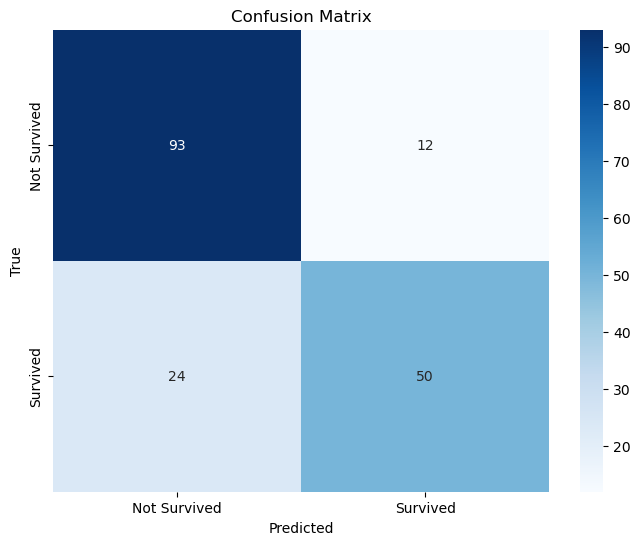

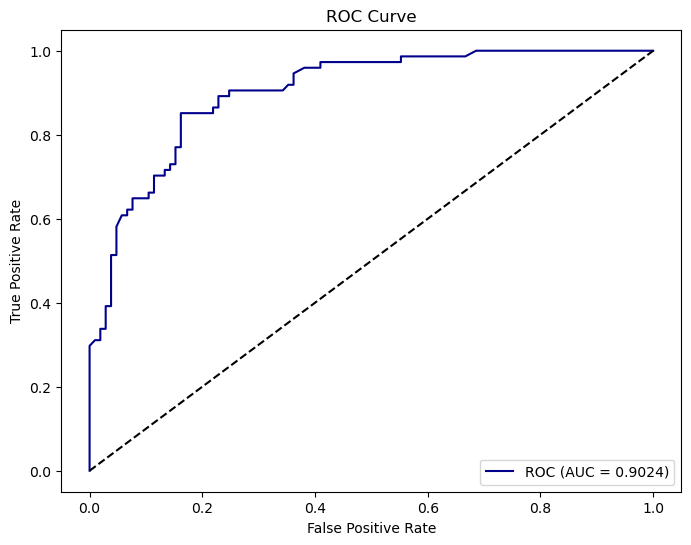

In [10]:
# ============ 1. 导入库 ============
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# ============ 2. 选择特征和目标变量 ============
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# 删除含缺失值的行
df = df[features + [target]].dropna()

# 拆分特征和目标
X = df[features]
y = df[target]

# ============ 3. 划分训练集和验证集 ============
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============ 4. 类别变量：使用 LabelEncoder ============
cat_cols = ['sex', 'embarked']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train_raw[col] = le.fit_transform(X_train_raw[col])
    X_test_raw[col] = le.transform(X_test_raw[col])
    encoders[col] = le  # 保存编码器以备将来使用或反编码

# ============ 5. 数值变量（和编码后类别变量）：直接使用 ============
X_train = X_train_raw.to_numpy()
X_test = X_test_raw.to_numpy()
feature_names = features

# ============ 6. 创建 LightGBM 数据集 ============
dtrain = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
dtest = lgb.Dataset(X_test, label=y_test)

# ============ 7. 设置 LightGBM 参数 ============
params = {
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 60,
    'max_depth': -1,
    'min_data_in_leaf': 30,
    'learning_rate': 0.03,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'lambda_l1': 0.1,
    'lambda_l2': 0.001,
    'verbosity': -1,
    'seed': 2019
}

# ============ 8. 模型训练 ============
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dtest],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(10)
    ]
)

# ============ 9. 模型预测 ============
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# ============ 10. 模型评估 ============
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ============ 11. 可视化 ============

# (1) 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# (2) ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()